In [1]:
import json

# Load the embeddings from the JSON file
with open('temperature1.json', 'r') as f:
    embeddings_data = json.load(f)

In [2]:
import numpy as np

# Extract embeddings from the loaded JSON data
embeddings = np.array([item['embedding'] for item in embeddings_data])

# Check the shape of the embeddings (should be (20, 1536) or similar depending on the model)
print(embeddings.shape)

(10, 1536)


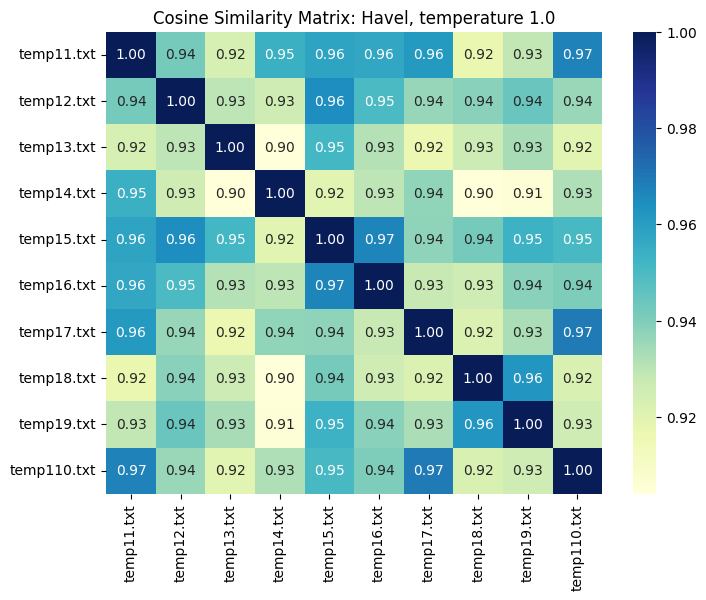

In [3]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

temperature1_cos_sim_matrix = cosine_similarity(embeddings)


# Visualize the similarity matrix for Churchill group
plt.figure(figsize=(8, 6))
sns.heatmap(temperature1_cos_sim_matrix, cmap='YlGnBu', annot=True, fmt='.2f', xticklabels=[f'temp1{i+1}.txt' for i in range(10)], yticklabels=[f'temp1{i+1}.txt' for i in range(10)])
plt.title("Cosine Similarity Matrix: Havel, temperature 1.0")
plt.show()

In [4]:
import numpy as np
mean_cos_sim = np.mean(temperature1_cos_sim_matrix)
print(f"Mean Cosine Similarity: {mean_cos_sim:.2f}")

Mean Cosine Similarity: 0.94


In [5]:


# Function to normalize cosine similarity matrix to a probability distribution
def normalize_similarity_matrix(similarity_matrix):
    flattened = similarity_matrix.flatten()
    
    # Normalize to get a probability distribution
    prob_dist = flattened / np.sum(flattened)
    
    return prob_dist

# Normalize similarity distributions
prob_dist_temp1 = normalize_similarity_matrix(temperature1_cos_sim_matrix)



In [6]:
from scipy.stats import entropy

# Calculate entropy
entropy_temp1 = entropy(prob_dist_temp1, base=2)
print(f"Entropy for temperature 1: {entropy_temp1}")


Entropy for temperature 1: 6.643359882988702


In [9]:
import numpy as np

# Assuming temperature1_cos_sim_matrix is your cosine similarity matrix
# Set the diagonal elements to NaN
np.fill_diagonal(temperature1_cos_sim_matrix, np.nan)

print(temperature1_cos_sim_matrix)

# Calculate the mean excluding NaN values
mean_cos_sim = np.nanmean(temperature1_cos_sim_matrix)
print(f"Mean Cosine Similarity (excluding diagonal): {mean_cos_sim:.5f}")


[[       nan 0.94156792 0.92330913 0.9541995  0.95791218 0.95701273
  0.96112966 0.91746522 0.92901833 0.96770811]
 [0.94156792        nan 0.92983666 0.92598919 0.96472815 0.94987708
  0.93625242 0.93829845 0.94445342 0.93573505]
 [0.92330913 0.92983666        nan 0.90406782 0.9516115  0.93130157
  0.9167678  0.92629157 0.9335863  0.91943674]
 [0.9541995  0.92598919 0.90406782        nan 0.91945708 0.92983323
  0.93731175 0.90424189 0.90543251 0.93242416]
 [0.95791218 0.96472815 0.9516115  0.91945708        nan 0.96669733
  0.9376832  0.94159581 0.95350321 0.9507537 ]
 [0.95701273 0.94987708 0.93130157 0.92983323 0.96669733        nan
  0.92777421 0.92607765 0.93844168 0.94016462]
 [0.96112966 0.93625242 0.9167678  0.93731175 0.9376832  0.92777421
         nan 0.9218489  0.93269466 0.96958818]
 [0.91746522 0.93829845 0.92629157 0.90424189 0.94159581 0.92607765
  0.9218489         nan 0.96228035 0.92257611]
 [0.92901833 0.94445342 0.9335863  0.90543251 0.95350321 0.93844168
  0.93269466